In [102]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
os.listdir('data/')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [15]:
# here we can find train data have many empty value
pd.DataFrame(train_df.isnull().sum()/train_df.shape[0]).transpose()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0


In [16]:
# here we can find test data have many empty value
pd.DataFrame(test_df.isnull().sum()/test_df.shape[0]).transpose()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.0,0.0,0.002742,0.155586,0.0,0.0,0.926662,0.0,0.0,0.001371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.000685,0.010966,0.010281,0.0,0.0,0.0,0.030158,0.030843,0.030158,0.028787,0.000685,0.028787,0.000685,0.000685,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001371,0.001371,0.0,0.0,0.0,0.0,0.000685,0.0,0.001371,0.0,0.500343,0.05209,0.053461,0.053461,0.000685,0.000685,0.053461,0.053461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997944,0.801234,0.965045,0.0,0.0,0.0,0.000685,0.0


In [7]:
# extract sale price first
original_y = train_df['SalePrice']
train_df.drop('SalePrice', axis=1, inplace=True)

In [10]:
# we can concat the train and test data to handle empty value together
data= pd.concat([train_df,test_df], keys=['train', 'test'])
data=data.drop(["Id"],axis=1)

In [21]:
# check the null value
empty = pd.DataFrame(data.isnull().sum()/data.shape[0])
empty =  empty[empty[0]!=0] # ignore the columns without empty value
empty.sort_values(by=0, ascending=False) # sort the value

,0
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageFinish,0.054471
GarageQual,0.054471
GarageCond,0.054471
GarageYrBlt,0.054471


In [25]:
# drop the columns have more than 20% empty values
data.drop(empty[empty[0] > 0.2].index.to_list(), axis=1, inplace=True)

In [33]:
# fill na values
for col in data.select_dtypes(include=['number']).columns:
    if data[col].isnull().sum() == 0:
        continue
    else:
        data[col].fillna(data[col].mean(),inplace=True)
        
for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().sum() == 0:
        continue
    else:
        data[col].fillna(data[col].mode()[0],inplace=True)

In [34]:
# check 
pd.DataFrame(data.isnull().sum()/data.shape[0]).transpose()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# feature selection 
data.shape

(2919, 74)

In [38]:
# convert objects type to numeric type
for col in data.select_dtypes(include=['object']).columns:
    data[col] = pd.factorize(data[col])[0]

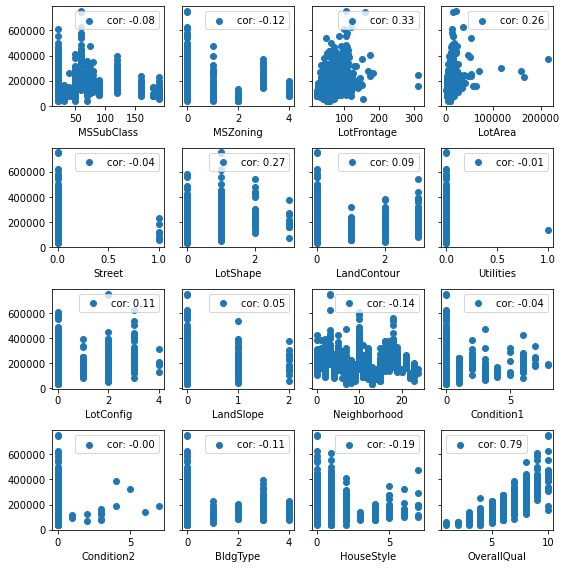

In [55]:
# we have 74 features, so we need find the correlation for them
correlation_score = []
col = data.columns.to_list()
fig, axs = plt.subplots(4, 4, figsize=(8, 8),sharey=True)
axs = axs.flatten()
train = data.loc['train']
for i in range(16):
    cor = np.corrcoef(train.iloc[:, i].values, original_y.values)[0][1]
    correlation_score.append(cor)
    axs[i].scatter(train.iloc[:, i].values, original_y.values)
    axs[i].legend([f'cor: {cor:.2f}'])
    axs[i].set_xlabel(col[i])
plt.tight_layout()

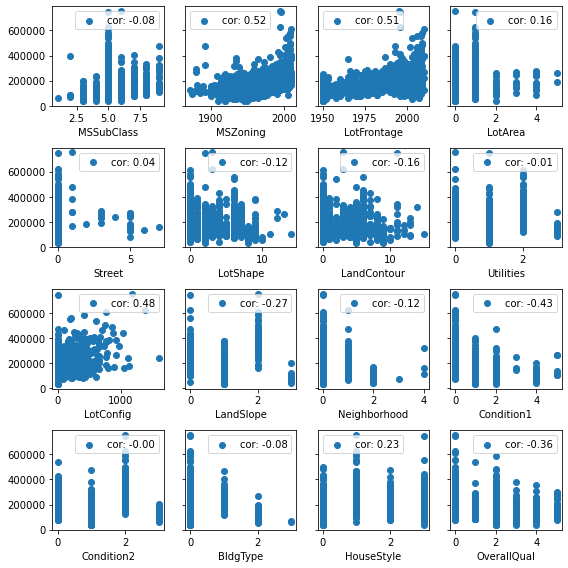

In [56]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8),sharey=True)
axs = axs.flatten()
for i in range(16):
    cor = np.corrcoef(train.iloc[:, i+16].values, original_y.values)[0][1]
    correlation_score.append(cor)
    axs[i].scatter(train.iloc[:, i+16].values, original_y.values)
    axs[i].legend([f'cor: {cor:.2f}'])
    axs[i].set_xlabel(col[i])
plt.tight_layout()

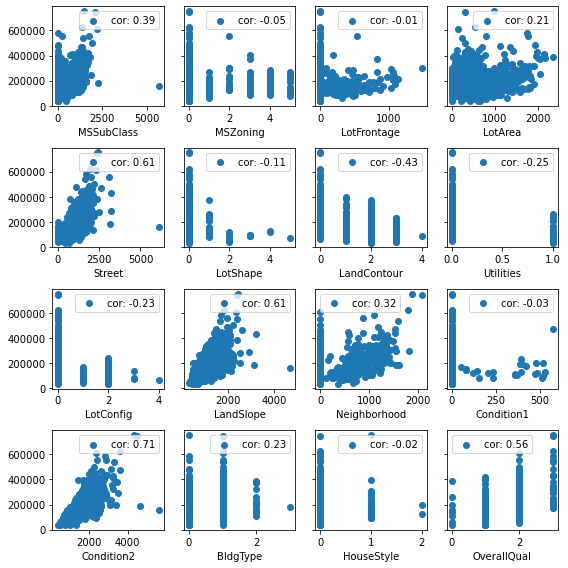

In [57]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8),sharey=True)
axs = axs.flatten()
for i in range(16):
    cor = np.corrcoef(train.iloc[:, i+16*2].values, original_y.values)[0][1]
    correlation_score.append(cor)
    axs[i].scatter(train.iloc[:, i+16*2].values, original_y.values)
    axs[i].legend([f'cor: {cor:.2f}'])
    axs[i].set_xlabel(col[i])
plt.tight_layout()

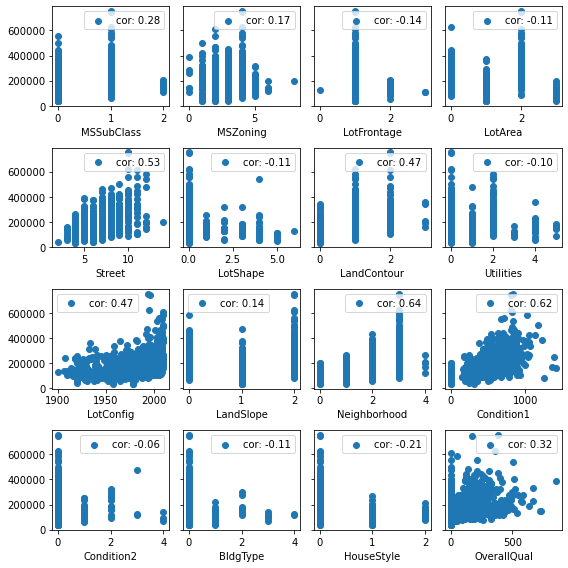

In [58]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8),sharey=True)
axs = axs.flatten()
for i in range(16):
    cor = np.corrcoef(train.iloc[:, i+16*3].values, original_y.values)[0][1]
    correlation_score.append(cor)
    axs[i].scatter(train.iloc[:, i+16*3].values, original_y.values)
    axs[i].legend([f'cor: {cor:.2f}'])
    axs[i].set_xlabel(col[i])
plt.tight_layout()

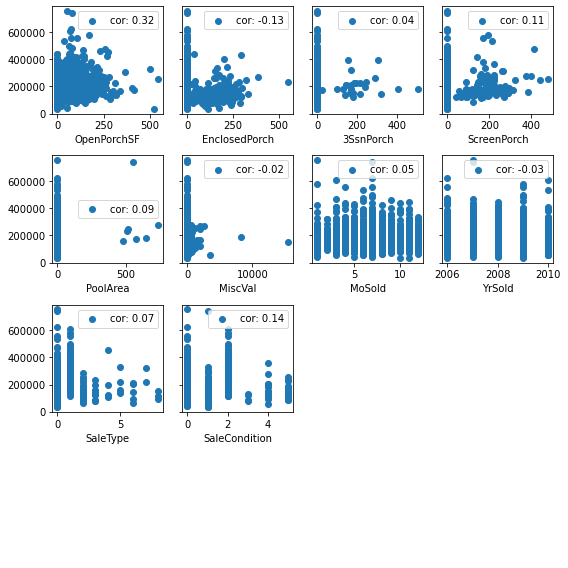

In [59]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8),sharey=True)
axs = axs.flatten()
for i in range(16*4, data.shape[1]):
    cor = np.corrcoef(train.iloc[:, i].values, original_y.values)[0][1]
    correlation_score.append(cor)
    axs[i-16*4].scatter(train.iloc[:, i].values, original_y.values)
    axs[i-16*4].legend([f'cor: {cor:.2f}'])
    axs[i-16*4].set_xlabel(col[i])
for i in range(10, 16):
    axs[i].axis('off')
plt.tight_layout()

In [190]:
# from the picture above, we can see more feature have a very low relationship will label saleprice
# so we need discharge those feature, only focus on the feature have strong relation ship will label
# here i think the abs correlationship value < 0.2  mean have no relationship, value between 0.2 and  0.6 mean have weak relationship
# and value greater than 0.6 have strong relationship, so we need delete the feature have correlationship small than 0.2
step2_data = data.loc[:, np.array(correlation_score) > 0.2]

In [176]:
# check the shape, here we find we have delete 24 feature 
step2_data.shape

(2919, 24)

<AxesSubplot:>

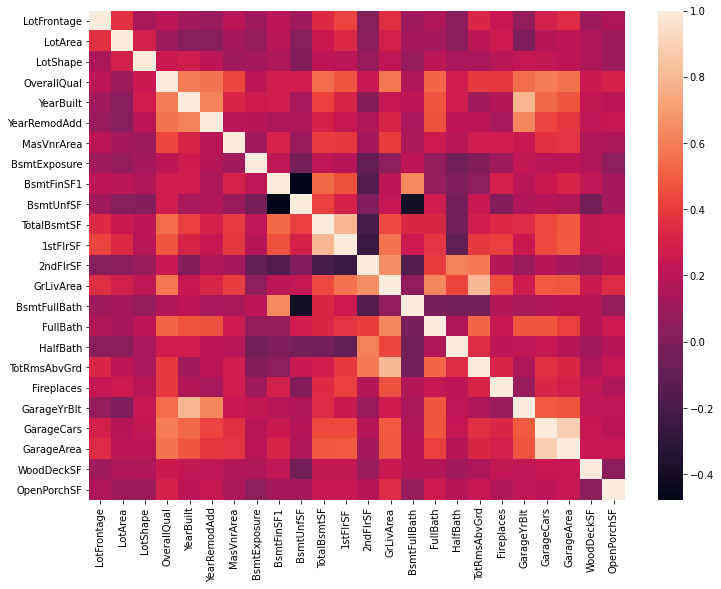

In [177]:
# check the feature correlationship with each other, we can find many feature pair have strong relationship
# each many cause series Collinearity
plt.figure(figsize=(12,9))
sns.heatmap(step2_data.corr())

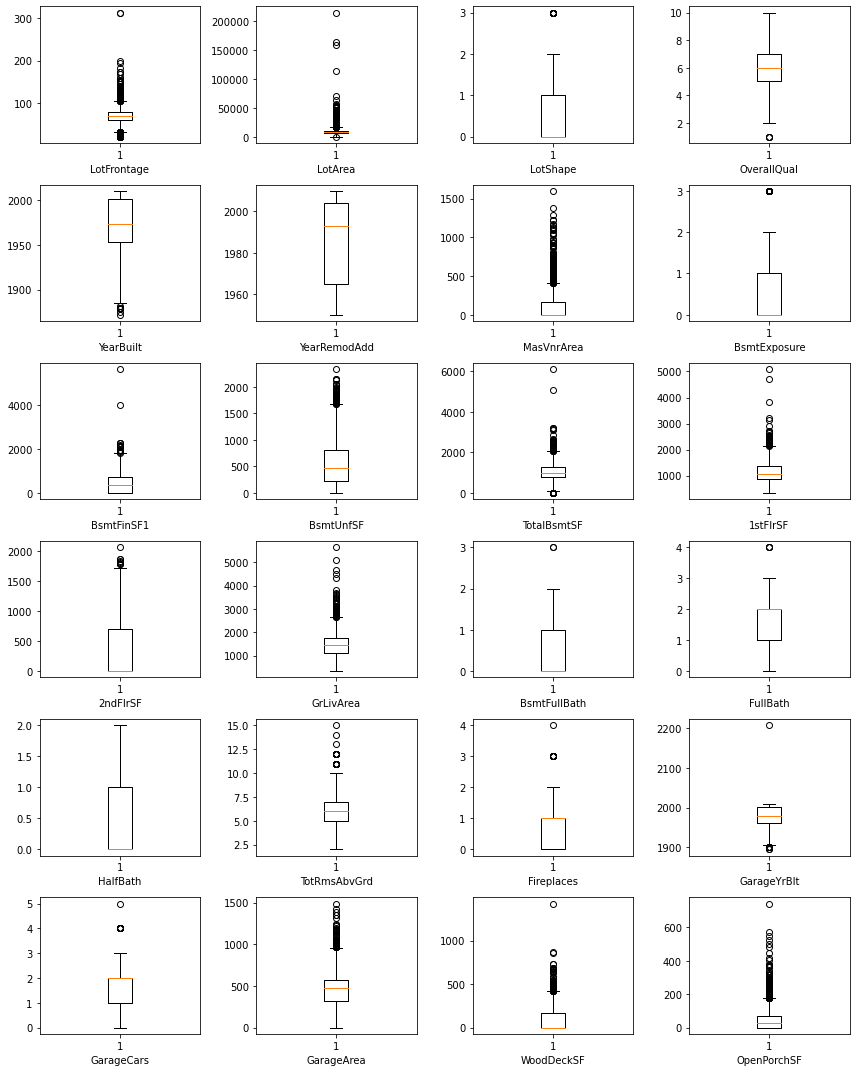

In [178]:
# convert outlines points in range
fig, axs = plt.subplots(6, 4, figsize=(12, 15))
axs = axs.flatten()
col = step2_data.columns.to_list()
string_col = data.select_dtypes(include=['object']).columns
for col_index in range(step2_data.shape[1]):
    if col[col_index] in string_col:
        axs[col_index].boxplot(step2_data.iloc[:, col_index], c='red',patch_artist = True)
    else:
        axs[col_index].boxplot(step2_data.iloc[:, col_index])
    axs[col_index].set_xlabel(col[col_index])
plt.tight_layout()

In [191]:
def top_bottom(x):
    Q3 = np.percentile(x, 75)
    Q1 = np.percentile(x, 25)
    LQR = Q3-Q1
    return Q1-1.5*LQR, Q3+1.5*LQR

for col in step2_data.columns.to_list():
    if col not in string_col:
        bottom, top = top_bottom(step2_data[col])
        step2_data[col][step2_data[col] < bottom] = bottom
        step2_data[col][step2_data[col] > top] = top

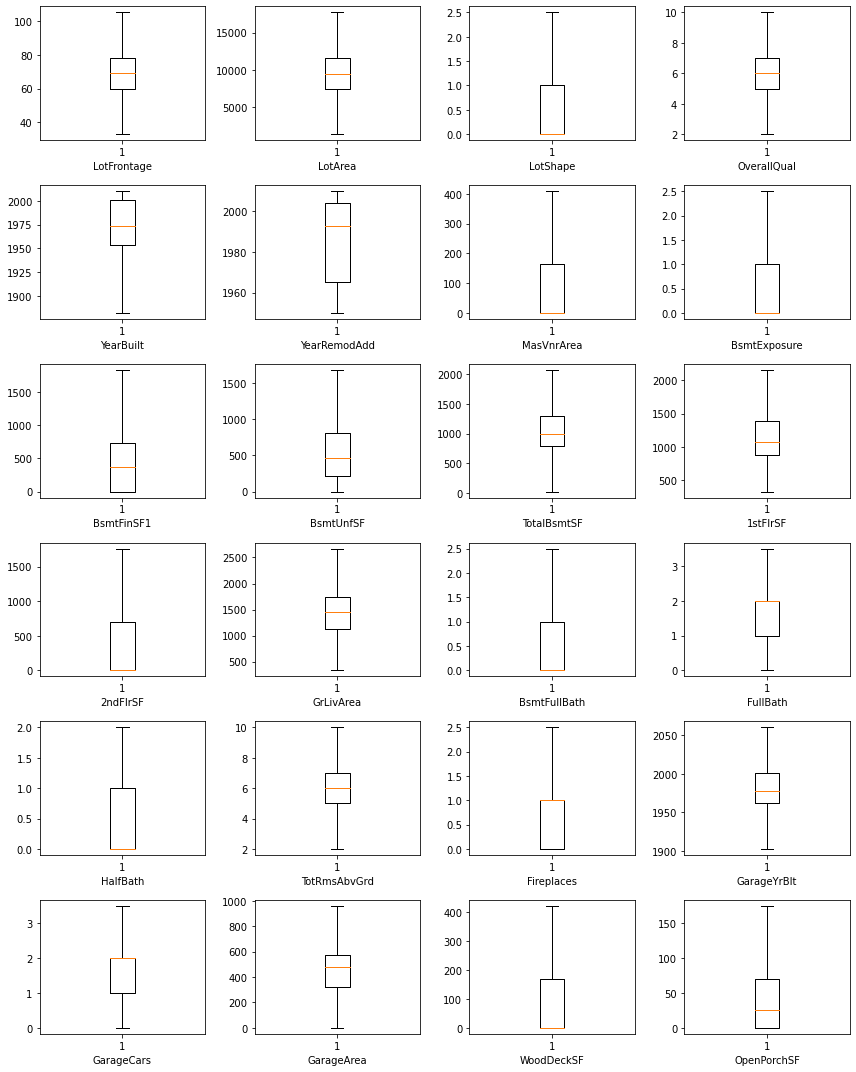

In [192]:
# check the feature distribution after convert outline process
fig, axs = plt.subplots(6, 4, figsize=(12, 15))
axs = axs.flatten()
col = step2_data.columns.to_list()
string_col = data.select_dtypes(include=['object']).columns
for col_index in range(step2_data.shape[1]):
    if col[col_index] in string_col:
        axs[col_index].boxplot(step2_data.iloc[:, col_index], c='red',patch_artist = True)
    else:
        axs[col_index].boxplot(step2_data.iloc[:, col_index])
    axs[col_index].set_xlabel(col[col_index])
plt.tight_layout()

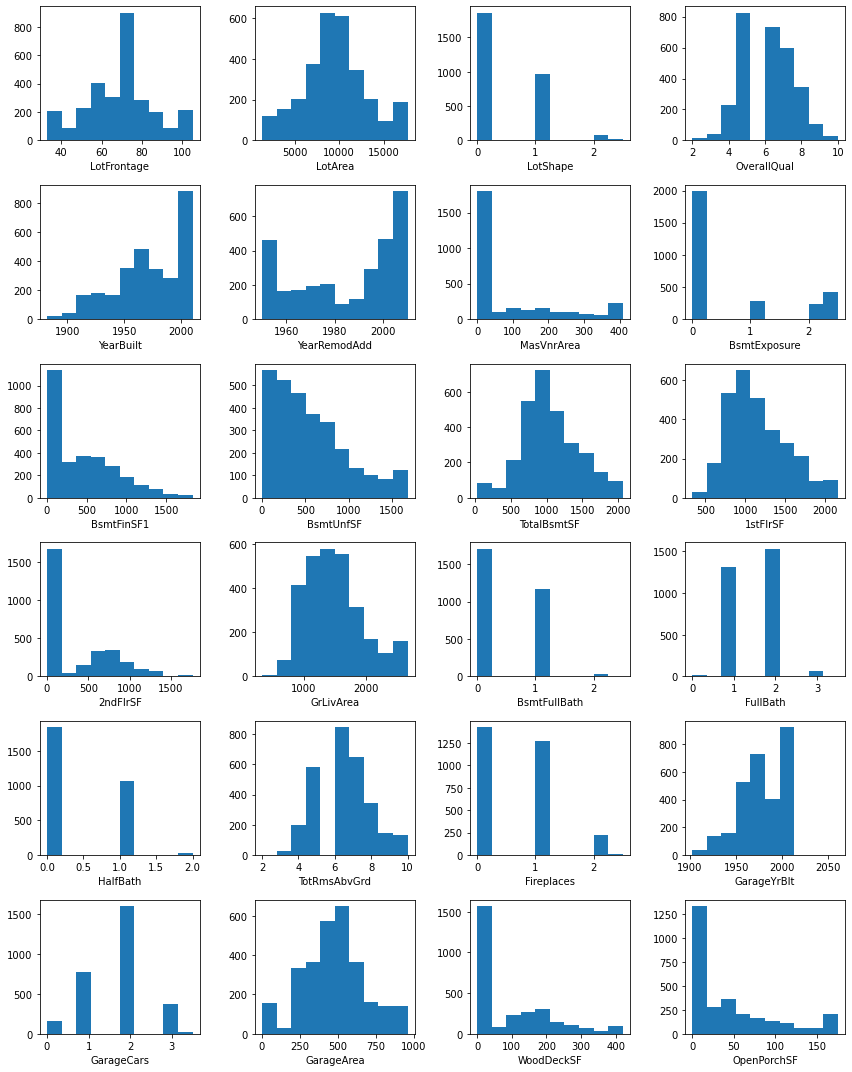

In [193]:
# we can see the distribution of the features
# we need do scale transform
fig, axs = plt.subplots(6, 4, figsize=(12, 15))
axs = axs.flatten()
col = step2_data.columns.to_list()
for col_index in range(step2_data.shape[1]):
    axs[col_index].hist(step2_data.iloc[:, col_index])
    axs[col_index].set_xlabel(col[col_index])
plt.tight_layout()

In [194]:
# make all feature value range in 0-1
std = MinMaxScaler()
train = step2_data.loc['train']
test = step2_data.loc['test']
std.fit(train)
train = std.transform(train)
test = std.transform(test)

In [74]:
# model selection, here i try to use linear model include lr, lasso ridge
# and neural new work MLP regression and ensemble random forest regressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [195]:
#train = step2_data.loc['train']
train_x, val_x, train_y, val_y = train_test_split(train, original_y, random_state=0, test_size=0.2)

In [211]:
# first mdoel  lr
r2_list = []
rmse = []
lr = LinearRegression()
lr.fit(train_x, train_y)
r2_list.append(lr.score(val_x,val_y))
rmse.append(mean_squared_error(lr.predict(val_x), val_y)**0.5)

In [212]:
ls =  LassoCV()
ls .fit(train_x, train_y)
r2_list.append(ls .score(val_x,val_y))
rmse.append(mean_squared_error(ls.predict(val_x), val_y)**0.5)

In [213]:
ri =  RidgeCV()
ri .fit(train_x, train_y)
r2_list.append(ri .score(val_x,val_y))
rmse.append(mean_squared_error(ri.predict(val_x), val_y)**0.5)

In [214]:
rft = RandomForestRegressor()
rft .fit(train_x, train_y)
r2_list.append(rft .score(val_x,val_y))
rmse.append(mean_squared_error(rft.predict(val_x), val_y)**0.5)

In [215]:
# the best r2 is random forest regressor
# so we need do parameters tunning
params = {
    'n_estimators':[100,300, 500],
    'max_depth': [None, 1, 2, 5, 8],
    'bootstrap':[True, False]
}
rtf = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5, n_jobs=5)
rtf.fit(train_x, train_y)
rft = RandomForestRegressor(**rtf.best_params_)
rft .fit(train_x, train_y)
r2_list.append(rft .score(val_x,val_y))
rmse.append(mean_squared_error(rft.predict(val_x), val_y)**0.5)

In [217]:
r2_list

[0.7727176036785793,
 0.7650587114964931,
 0.7635488242470105,
 0.8357040101382555,
 0.8483706701710352]

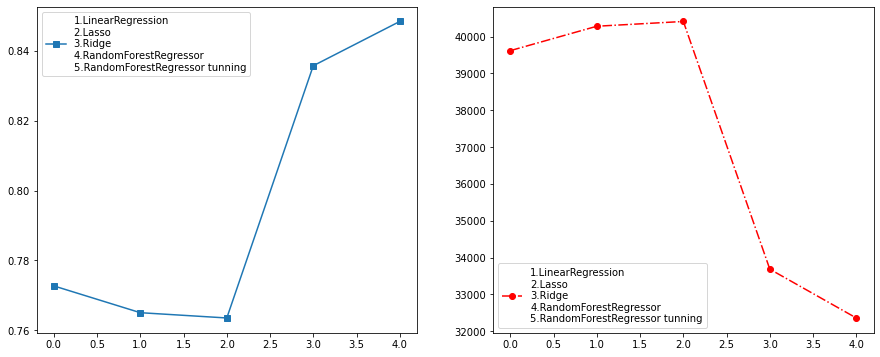

In [233]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs = axs.flatten()
content = '1.LinearRegression' + '\n' + '2.Lasso' + '\n' + \
    '3.Ridge' + '\n' + '4.RandomForestRegressor' + '\n' + '5.RandomForestRegressor tunning'
axs[0].plot(range(5), r2_list, marker='s')
axs[0].legend([content])
axs[1].plot(range(5), rmse, marker='o', linestyle='-.', c='r')
axs[1].legend([content])

In [247]:
# use model 
test_pred = rtf.predict(test)

<AxesSubplot:xlabel='y', ylabel='Count'>

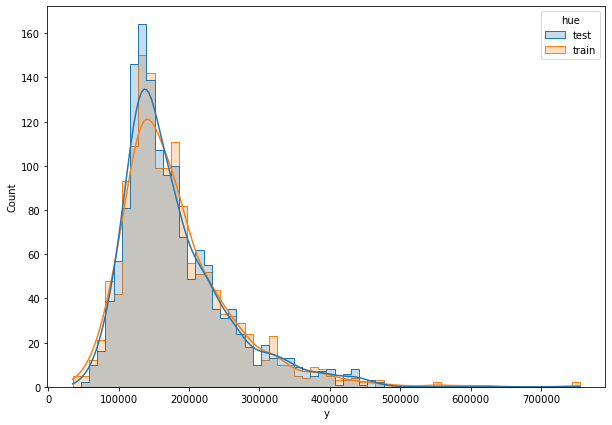

In [255]:
# prediction result have very similiar distribution with original y, so the prediction result is Credible
temp_y = np.vstack([test_pred.reshape(-1, 1), original_y.values.reshape(-1, 1)])
hue = ['test']*len(test_pred) + ['train'] *len(original_y)
temp_df = pd.DataFrame(columns=['y','hue'], index=range(len(hue)))
temp_df['y'] = temp_y
temp_df['hue'] = hue
plt.figure(figsize=(10, 7))
ax = plt.gca()
sns.histplot(data=temp_df, x='y', hue='hue',kde=True, ax=ax,element="step")